In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

%matplotlib inline

In [2]:
df=pd.read_csv("data/report_anonymous_clean.csv", sep=";", encoding = 'utf8')

df['DATA_PRELIEVO'] = pd.to_datetime(df['DATA_PRELIEVO'])
df['DATA_ULTIMA_MESTRUAZIONE'] = pd.to_datetime(df['DATA_ULTIMA_MESTRUAZIONE'])
df['DATA_PAP_PRECEDENTE'] = pd.to_datetime(df['DATA_PAP_PRECEDENTE'])

# drop cols 'Unnamed 0'
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df

,ETA_PRELIEVO,DATA_PRELIEVO,DATA_ULTIMA_MESTRUAZIONE,DATA_PAP_PRECEDENTE,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,...,CITO_PREC,VIRALE_PREC,BATT_PREC,CONTROLLO,CTRL_ISTOLOGICO,VALIDITA_CAMPIONE,CAUSA_CAMPIONE_NON_VALIDO,BATT,CITO,VIRALE
0,54,2018-04-01,NaT,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
1,49,2015-11-01,2015-10-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,CANDIDA,NEGATIVO,NaN
2,45,2015-07-01,2015-06-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,ASCUS,NaN
3,66,2016-04-01,NaT,2012-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,NaN,NaN,ADEGUATO,NaN,NaN,AGC-NOS,NaN
4,41,2016-03-01,2016-02-01,2013-01-01,False,True,True,False,False,False,...,NEGATIVO,NaN,NaN,12.0,NaN,ADEGUATO,NaN,DODERLEIN,NEGATIVO,NaN
5,24,2016-05-01,2016-04-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
6,29,2016-06-01,2016-05-01,NaT,False,True,True,False,False,True,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
7,27,2016-04-01,2016-03-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN
8,55,2016-06-01,NaT,2016-01-01,False,True,True,False,False,False,...,NEGATIVO,HPV,NaN,12.0,NaN,NaN,NaN,COCCHI,NEGATIVO,NaN
9,33,2015-03-01,2015-02-01,NaT,False,True,True,False,False,False,...,NaN,NaN,NaN,12.0,NaN,ADEGUATO,NaN,COCCHI,NEGATIVO,NaN


In [3]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [4]:
df['ETA_PRELIEVO'].describe()

count    8804.000000
mean       42.579396
std        12.502984
min        12.000000
25%        33.000000
50%        42.000000
75%        51.000000
max        88.000000
Name: ETA_PRELIEVO, dtype: float64

In [5]:
ETA_PRELIEVO = df.groupby('ETA_PRELIEVO')['ETA_PRELIEVO'].count()
print(ETA_PRELIEVO)

ETA_PRELIEVO
12      1
13      2
14      1
16      4
17      4
18     13
19     32
20     59
21     83
22    121
23    111
24    134
25    142
26    145
27    170
28    161
29    203
30    221
31    219
32    226
33    237
34    235
35    265
36    269
37    258
38    250
39    235
40    250
41    229
42    261
     ... 
58    120
59     90
60     84
61     86
62     71
63     79
64     62
65     49
66     54
67     51
68     41
69     43
70     42
71     37
72     34
73     26
74     18
75      9
76     22
77     19
78      8
79      4
80      5
81      2
82      2
83      3
84      3
85      4
87      1
88      1
Name: ETA_PRELIEVO, Length: 75, dtype: int64


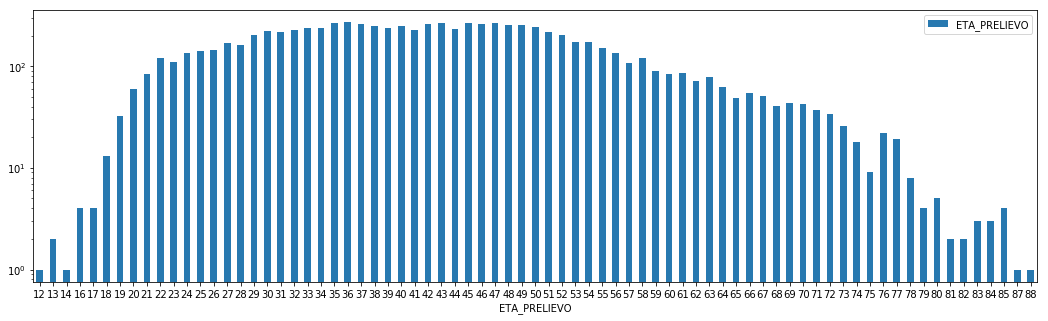

In [6]:
ETA_PRELIEVO.plot(kind='bar', figsize=(18,5), rot=0, legend=True, color='#2879b0', logy=True)

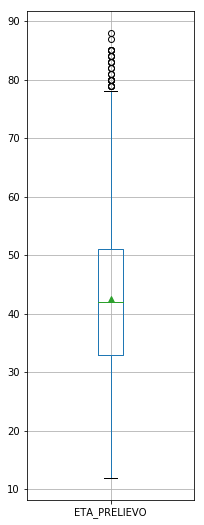

In [7]:
df.boxplot('ETA_PRELIEVO', figsize=(3,9), showmeans=True, rot=0)

In [8]:
df['DATA_PRELIEVO'].describe()

count                    8802
unique                     69
top       2014-09-01 00:00:00
freq                      220
first     2007-11-01 00:00:00
last      2018-04-01 00:00:00
Name: DATA_PRELIEVO, dtype: object

In [9]:
DATA_PRELIEVO = df['DATA_PRELIEVO'].groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO')]).count()
print(DATA_PRELIEVO)

ANNO
2007.0       3
2010.0       1
2012.0      13
2013.0    1428
2014.0    1972
2015.0    1801
2016.0    1702
2017.0    1415
2018.0     467
Name: DATA_PRELIEVO, dtype: int64


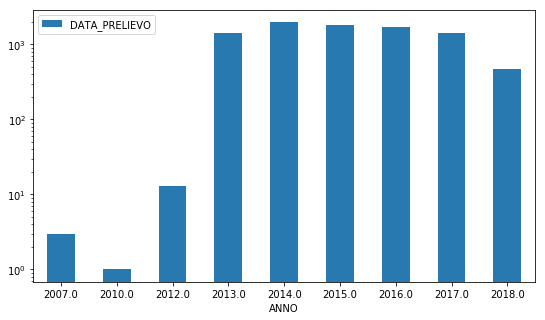

In [10]:
DATA_PRELIEVO.plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0', logy=True)

In [11]:
DATA_PRELIEVO_YM = df['DATA_PRELIEVO']\
                        .groupby([df["DATA_PRELIEVO"].dt.year.rename('ANNO'), df["DATA_PRELIEVO"].dt.month.rename('MESE')])\
                        .count()
print(DATA_PRELIEVO_YM)

ANNO    MESE
2007.0  11.0      3
2010.0  4.0       1
2012.0  3.0       1
        11.0      2
        12.0     10
2013.0  1.0      30
        2.0      28
        3.0       3
        4.0     114
        5.0     189
        6.0     159
        7.0     146
        8.0      98
        9.0     152
        10.0    195
        11.0    156
        12.0    158
2014.0  1.0     136
        2.0     164
        3.0     196
        4.0     171
        5.0     180
        6.0     142
        7.0     155
        8.0     114
        9.0     220
        10.0    183
        11.0    166
        12.0    145
2015.0  1.0     144
               ... 
        11.0    143
        12.0    101
2016.0  1.0     138
        2.0     135
        3.0     155
        4.0     148
        5.0     217
        6.0     155
        7.0     108
        8.0      89
        9.0     177
        10.0    159
        11.0    140
        12.0     81
2017.0  1.0      71
        2.0     112
        3.0     139
        4.0      90
       

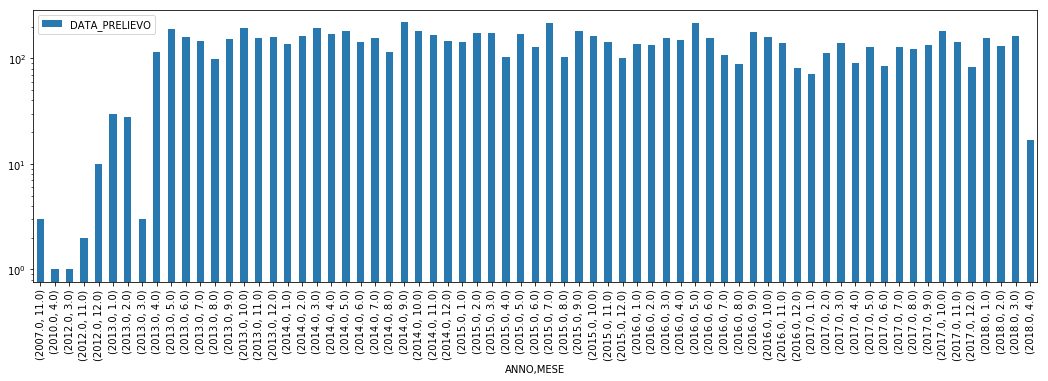

In [12]:
DATA_PRELIEVO_YM.plot(kind='bar', figsize=(18,5), rot=90, legend=True, color='#2879b0', logy=True)

In [13]:
df['GRAVIDANZE'].describe()

count    2872.000000
mean        1.755919
std         0.722312
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         8.000000
Name: GRAVIDANZE, dtype: float64

In [14]:
GRAVIDANZE = df.groupby('GRAVIDANZE')['GRAVIDANZE'].count()
print(GRAVIDANZE)

GRAVIDANZE
0.0       2
1.0    1076
2.0    1484
3.0     262
4.0      36
5.0       6
6.0       4
7.0       1
8.0       1
Name: GRAVIDANZE, dtype: int64


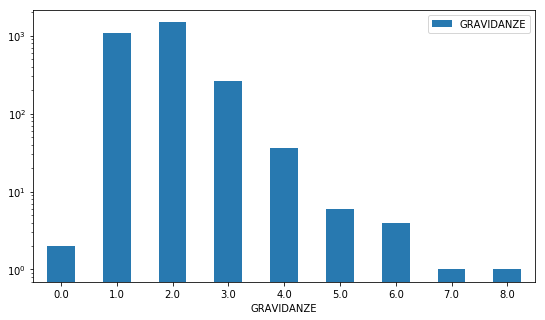

In [15]:
GRAVIDANZE.plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0', logy=True)

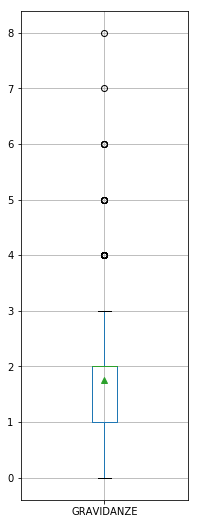

In [16]:
df.boxplot('GRAVIDANZE', figsize=(3,9), showmeans=True, rot=0)

In [17]:
df['ABORTI'].describe()

count    813.000000
mean       1.399754
std        0.808727
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: ABORTI, dtype: float64

In [18]:
ABORTI = df.groupby('ABORTI')['ABORTI'].count()
print(ABORTI)

ABORTI
1.0    595
2.0    151
3.0     42
4.0     13
5.0     11
8.0      1
Name: ABORTI, dtype: int64


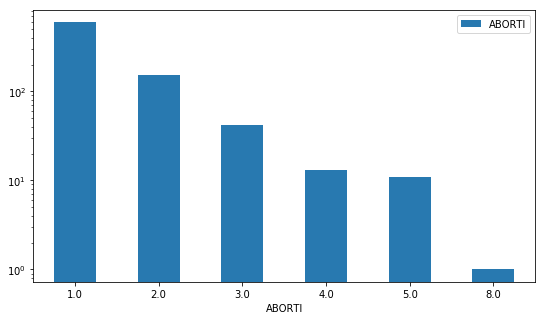

In [19]:
ABORTI.plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0', logy=True)

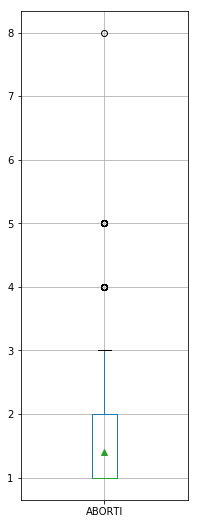

In [20]:
df.boxplot('ABORTI', figsize=(3,9), showmeans=True, rot=0)

In [21]:
df['PRIMO_PAP'].describe()

count     8804
unique       2
top       True
freq      6572
Name: PRIMO_PAP, dtype: object

In [22]:
PRIMO_PAP = df.groupby('PRIMO_PAP')['PRIMO_PAP'].count()
print(PRIMO_PAP)

PRIMO_PAP
False    2232
True     6572
Name: PRIMO_PAP, dtype: int64


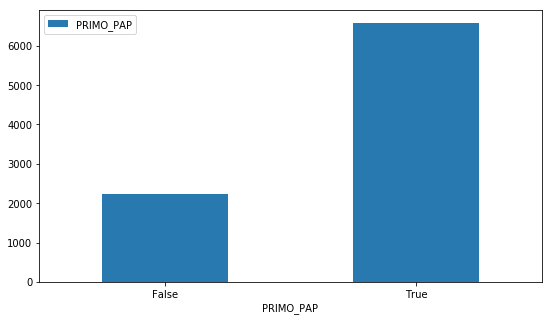

In [23]:
df['PRIMO_PAP'].groupby(df["PRIMO_PAP"])\
            .count()\
            .plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0')

In [24]:
df['CONTROLLO'].describe()

count    8208.000000
mean       11.906433
std         0.747861
min         3.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: CONTROLLO, dtype: float64

In [25]:
CONTROLLO = df.groupby('CONTROLLO')['CONTROLLO'].count()
print(CONTROLLO)

CONTROLLO
3.0        2
6.0      125
12.0    8081
Name: CONTROLLO, dtype: int64


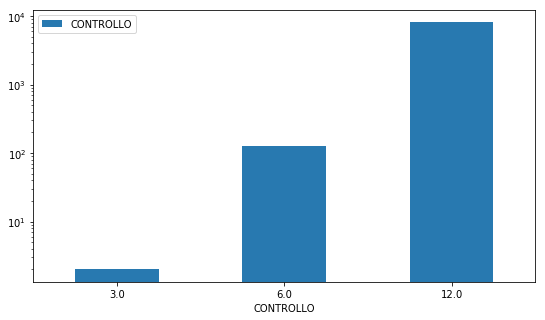

In [26]:
CONTROLLO.plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0', logy=True)

In [27]:
df['VALIDITA_CAMPIONE'].describe()

count         8654
unique           3
top       ADEGUATO
freq          8624
Name: VALIDITA_CAMPIONE, dtype: object

In [28]:
VALIDITA_CAMPIONE = df.groupby('VALIDITA_CAMPIONE')['VALIDITA_CAMPIONE'].count()
print(VALIDITA_CAMPIONE)

VALIDITA_CAMPIONE
ADEGUATO       8624
INADEGUATO       28
SUBOTTIMALE       2
Name: VALIDITA_CAMPIONE, dtype: int64


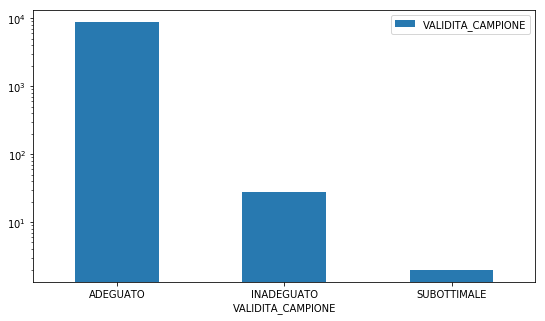

In [29]:
VALIDITA_CAMPIONE.plot(kind='bar', figsize=(9,5), rot=0, legend=True, color='#2879b0', logy=True)

In [30]:
df['BATT'].describe()

count       1015
unique         9
top       COCCHI
freq         325
Name: BATT, dtype: object

In [31]:
BATT = df.groupby('BATT')['BATT'].count()
print(BATT)

BATT
ACTINOMYCES     13
CANDIDA        229
CLAMYDIA         1
COCCHI         325
DODERLEIN      228
FLOGOSI         85
GARDNERELLA      9
TRICHOMONAS      6
VAGINOSI       119
Name: BATT, dtype: int64


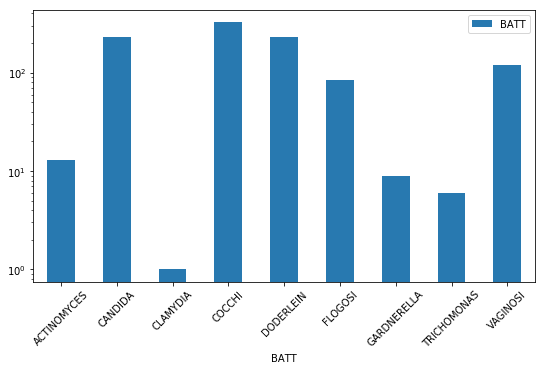

In [32]:
BATT.plot(kind='bar', figsize=(9,5), rot=45, legend=True, color='#2879b0', logy=True)

In [33]:
df['CITO'].describe()

count         8711
unique           9
top       NEGATIVO
freq          8447
Name: CITO, dtype: object

In [34]:
CITO = df.groupby('CITO')['CITO'].count()
print(CITO)

CITO
AGC-NEOPLASTIC       2
AGC-NOS              6
AIS                  1
ASC-H                2
ASCUS              129
HSIL                17
LSIL               106
NEGATIVO          8447
SCC                  1
Name: CITO, dtype: int64


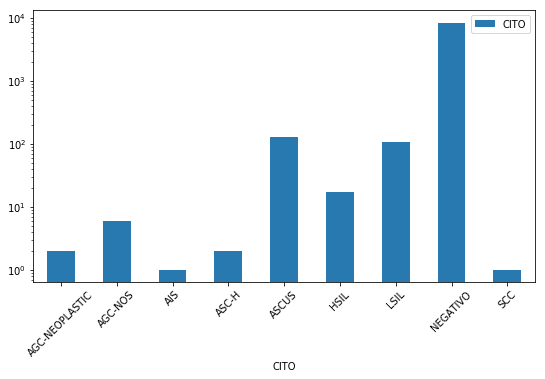

In [35]:
CITO.plot(kind='bar', figsize=(9,5), rot=45, legend=True, color='#2879b0', logy=True)

In [36]:
print('number of columns: ',len(df.columns))
print(df.columns)

number of columns:  32
Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')


In [37]:
N_PERDITE_ER = len(df[df['PERDITE_ER'] == True])
N_LEUCORREA = len(df[df['LEUCORREA'] == True])
N_PRURITO = len(df[df['PRURITO'] == True])

SINTOMI = pd.Series({'PERDITE_ER':N_PERDITE_ER,'LEUCORREA':N_LEUCORREA,'PRURITO':N_PRURITO})
SINTOMI.rename('SINTOMI', inplace=True)
print(SINTOMI)

PERDITE_ER     12
LEUCORREA     147
PRURITO         2
Name: SINTOMI, dtype: int64


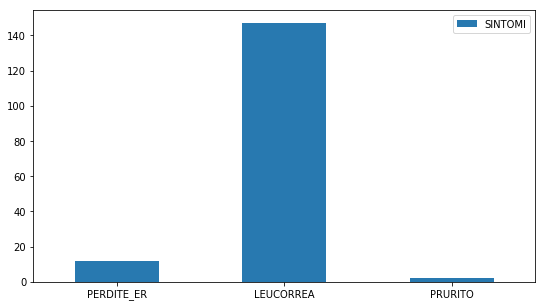

In [38]:
SINTOMI.plot(kind='bar', figsize=(9,5), legend = True, rot=0, color='#2879b0')

In [39]:
N_MENOPAUSA = len(df[df['MENOPAUSA'] == True])
N_AMENORREA = len(df[df['AMENORREA'] == True])
N_POST_PARTUM = len(df[df['POST_PARTUM'] == True])

STATI_FISIOLOGICI = pd.Series({'MENOPAUSA':N_MENOPAUSA,'AMENORREA':N_AMENORREA,'POST_PARTUM':N_POST_PARTUM})
STATI_FISIOLOGICI.rename('STATI_FISIOLOGICI', inplace=True)
print(STATI_FISIOLOGICI)

MENOPAUSA      1116
AMENORREA        39
POST_PARTUM     118
Name: STATI_FISIOLOGICI, dtype: int64


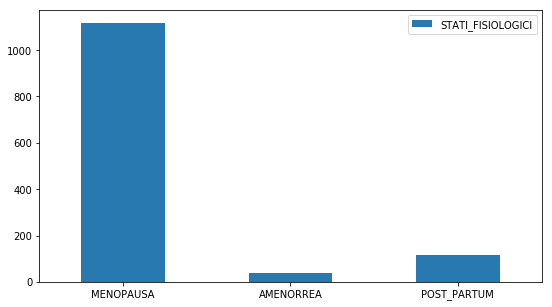

In [40]:
STATI_FISIOLOGICI.plot(kind='bar', legend = True, figsize=(9,5), rot=0, color='#2879b0')

In [41]:
N_FORNICE = len(df[df['FORNICE'] == True])
N_PORTIO = len(df[df['PORTIO'] == True])
N_CAN_CERV = len(df[df['CAN_CERV'] == True])
N_CAV_UT = len(df[df['CAV_UT'] == True])

TIPO_PRELIEVO = pd.Series({'FORNICE':N_FORNICE,'PORTIO':N_PORTIO,'CAN_CERV':N_CAN_CERV, 'CAV_UT': N_CAV_UT})
TIPO_PRELIEVO.rename('TIPO_PRELIEVO', inplace=True)
print(TIPO_PRELIEVO)

FORNICE        4
PORTIO      8548
CAN_CERV    8537
CAV_UT       134
Name: TIPO_PRELIEVO, dtype: int64


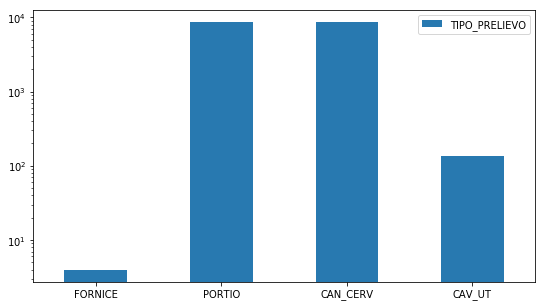

In [42]:
TIPO_PRELIEVO.plot(kind='bar', legend = True, figsize=(9,5), rot=0, color='#2879b0', logy = True)

In [43]:
'TER_RAD', 'TER_ORM', 'OP_GIN'
N_TER_RAD = len(df[df['TER_RAD'] == True])
N_TER_ORM = len(df[df['TER_ORM'] == True])
N_OP_GIN = len(df[df['OP_GIN'] == True])

DATI_OBIETTIVI = pd.Series({'TER_RAD':N_TER_RAD,'TER_ORM':N_TER_ORM,'OP_GIN':N_OP_GIN})
DATI_OBIETTIVI.rename('DATI_OBIETTIVI', inplace=True)
print(DATI_OBIETTIVI)

TER_RAD       4
TER_ORM     422
OP_GIN     1408
Name: DATI_OBIETTIVI, dtype: int64


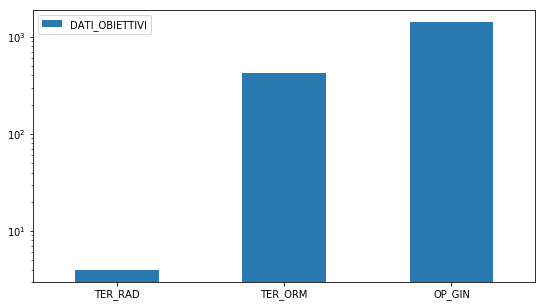

In [44]:
DATI_OBIETTIVI.plot(kind='bar', legend = True, figsize=(9,5), rot=0, color='#2879b0', logy = True)

In [45]:
N_TEST_ESTR = len(df[df['TEST_ESTR'] == True])
N_TER_ANTIF = len(df[df['TER_ANTIF'] == True])

TEST_CONSIGLIATI = pd.Series({'TEST_ESTR':N_TEST_ESTR,'TER_ANTIF':N_TER_ANTIF})
TEST_CONSIGLIATI.rename('TEST_CONSIGLIATI', inplace=True)
print(TEST_CONSIGLIATI)

TEST_ESTR      4
TER_ANTIF    416
Name: TEST_CONSIGLIATI, dtype: int64


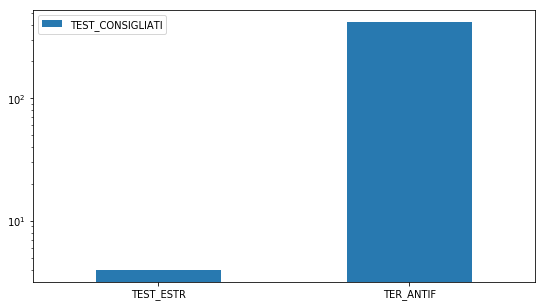

In [46]:
TEST_CONSIGLIATI.plot(kind='bar', legend = True, figsize=(9,5), rot=0, color='#2879b0', logy = True)

In [47]:
DELTA_PREL_MESTR = pd.DataFrame({'ID': [i for i in range(8804)], 'DELTA': df['DATA_PRELIEVO'] - df['DATA_ULTIMA_MESTRUAZIONE']})
DELTA_PREL_MESTR.dropna(inplace=True)
DELTA_PREL_MESTR['DELTA'] = DELTA_PREL_MESTR['DELTA'].astype('timedelta64[M]')
DELTA_PREL_MESTR['DELTA'].describe()

count    5075.000000
mean        1.044335
std         6.953461
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       277.000000
Name: DELTA, dtype: float64

In [48]:
DELTA_PREL_MESTR = DELTA_PREL_MESTR.groupby('DELTA')['ID'].count()
DELTA_PREL_MESTR.rename('DELTA (PRELIEVO - ULTIMA MESTR.)', inplace=True)
DELTA_PREL_MESTR

DELTA
0.0      3313
1.0      1320
2.0       191
3.0        57
4.0        39
5.0        27
6.0        16
7.0         7
8.0         7
9.0        11
10.0       11
11.0       10
12.0        1
13.0        8
14.0        5
15.0        5
16.0        2
17.0        4
18.0        3
19.0        1
20.0        1
22.0        5
23.0        1
24.0        2
25.0        1
27.0        3
28.0        1
32.0        1
33.0        2
34.0        4
44.0        1
45.0        1
50.0        1
61.0        1
65.0        1
68.0        1
73.0        1
82.0        1
91.0        1
96.0        1
97.0        1
119.0       2
120.0       1
206.0       1
277.0       1
Name: DELTA (PRELIEVO - ULTIMA MESTR.), dtype: int64

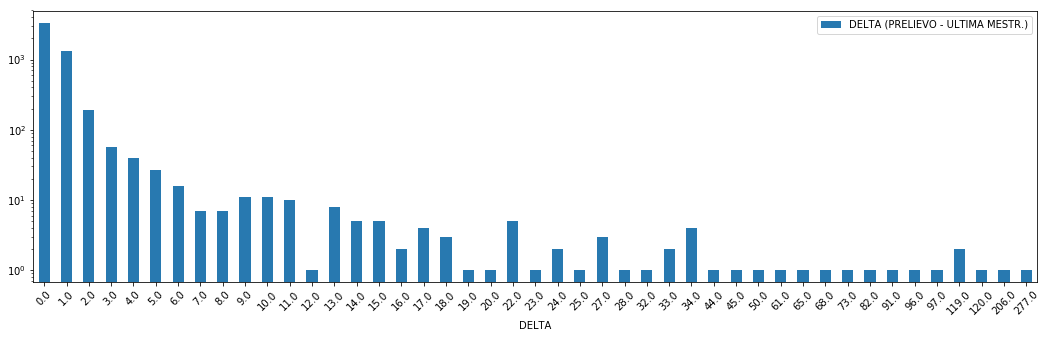

In [49]:
DELTA_PREL_MESTR.plot(kind='bar', figsize=(18,5), legend = True, rot=45, color='#2879b0', logy = True)

In [50]:
df.columns

Index(['ETA_PRELIEVO', 'DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'GRAVIDANZE', 'ABORTI', 'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CONTROLLO', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE'],
      dtype='object')

In [51]:
df.dtypes

ETA_PRELIEVO                          int64
DATA_PRELIEVO                datetime64[ns]
DATA_ULTIMA_MESTRUAZIONE     datetime64[ns]
DATA_PAP_PRECEDENTE          datetime64[ns]
FORNICE                                bool
PORTIO                                 bool
CAN_CERV                               bool
CAV_UT                                 bool
PERDITE_ER                             bool
LEUCORREA                              bool
PRURITO                                bool
TER_RAD                                bool
TER_ORM                                bool
GRAVIDANZE                          float64
ABORTI                              float64
TEST_ESTR                              bool
TER_ANTIF                              bool
OP_GIN                                 bool
MENOPAUSA                              bool
AMENORREA                              bool
POST_PARTUM                            bool
PRIMO_PAP                              bool
CITO_PREC                       

## Correlation Matrix

In [52]:
correlation_matrix= df.corr()
correlation_matrix

,ETA_PRELIEVO,FORNICE,PORTIO,CAN_CERV,CAV_UT,PERDITE_ER,LEUCORREA,PRURITO,TER_RAD,TER_ORM,GRAVIDANZE,ABORTI,TEST_ESTR,TER_ANTIF,OP_GIN,MENOPAUSA,AMENORREA,POST_PARTUM,PRIMO_PAP,CONTROLLO
ETA_PRELIEVO,1.000000,0.029281,-0.116991,-0.118795,0.152895,0.020943,-0.059997,0.011961,0.028002,-0.093457,0.284171,0.059568,0.008391,-0.066370,0.070919,0.547077,-0.029221,-0.076586,-0.083615,0.025533
FORNICE,0.029281,1.000000,-0.123197,-0.120555,-0.002651,-0.000788,-0.002778,-0.000321,-0.000455,-0.004784,-0.003996,NaN,-0.000455,-0.004748,0.005239,0.039938,-0.001422,-0.002485,0.000173,0.002763
PORTIO,-0.116991,-0.123197,1.000000,0.903655,-0.718381,0.006393,0.011999,0.002609,-0.091476,-0.008636,-0.032617,-0.098534,0.003690,0.003493,-0.125519,-0.078326,0.011544,0.008413,0.004815,0.001965
CAN_CERV,-0.118795,-0.120555,0.903655,1.000000,-0.702975,0.006534,0.007537,0.002666,-0.089474,-0.016129,-0.035884,-0.075580,0.003770,0.001923,-0.119807,-0.083923,0.011797,0.014853,0.003517,0.001030
CAV_UT,0.152895,-0.002651,-0.718381,-0.702975,1.000000,-0.004593,-0.008959,-0.001874,0.084421,-0.019209,0.041301,0.015181,-0.002651,-0.023313,0.158374,0.108793,-0.008293,-0.014490,0.014869,-0.000405
PERDITE_ER,0.020943,-0.000788,0.006393,0.006534,-0.004593,1.000000,0.043240,-0.000557,-0.000788,0.006122,-0.019535,-0.017357,-0.000788,0.006283,-0.016119,0.004431,-0.002464,-0.004306,0.007376,-0.020796
LEUCORREA,-0.059997,-0.002778,0.011999,0.007537,-0.008959,0.043240,1.000000,0.115678,-0.002778,-0.004341,0.007575,0.019490,-0.002778,0.067073,-0.022998,-0.020339,-0.008692,-0.007479,0.010734,0.000214
PRURITO,0.011961,-0.000321,0.002609,0.002666,-0.001874,-0.000557,0.115678,1.000000,-0.000321,-0.003382,-0.009355,NaN,-0.000321,-0.003357,-0.006577,0.016910,-0.001005,-0.001757,-0.008541,0.001953
TER_RAD,0.028002,-0.000455,-0.091476,-0.089474,0.084421,-0.000788,-0.002778,-0.000321,1.000000,0.020167,0.006308,NaN,-0.000455,-0.004748,0.019781,0.039938,-0.001422,-0.002485,-0.012080,0.002763
TER_ORM,-0.093457,-0.004784,-0.008636,-0.016129,-0.019209,0.006122,-0.004341,-0.003382,0.020167,1.000000,0.006752,-0.058744,-0.004784,0.000150,0.015247,-0.040741,-0.014967,-0.026153,0.013427,-0.008979


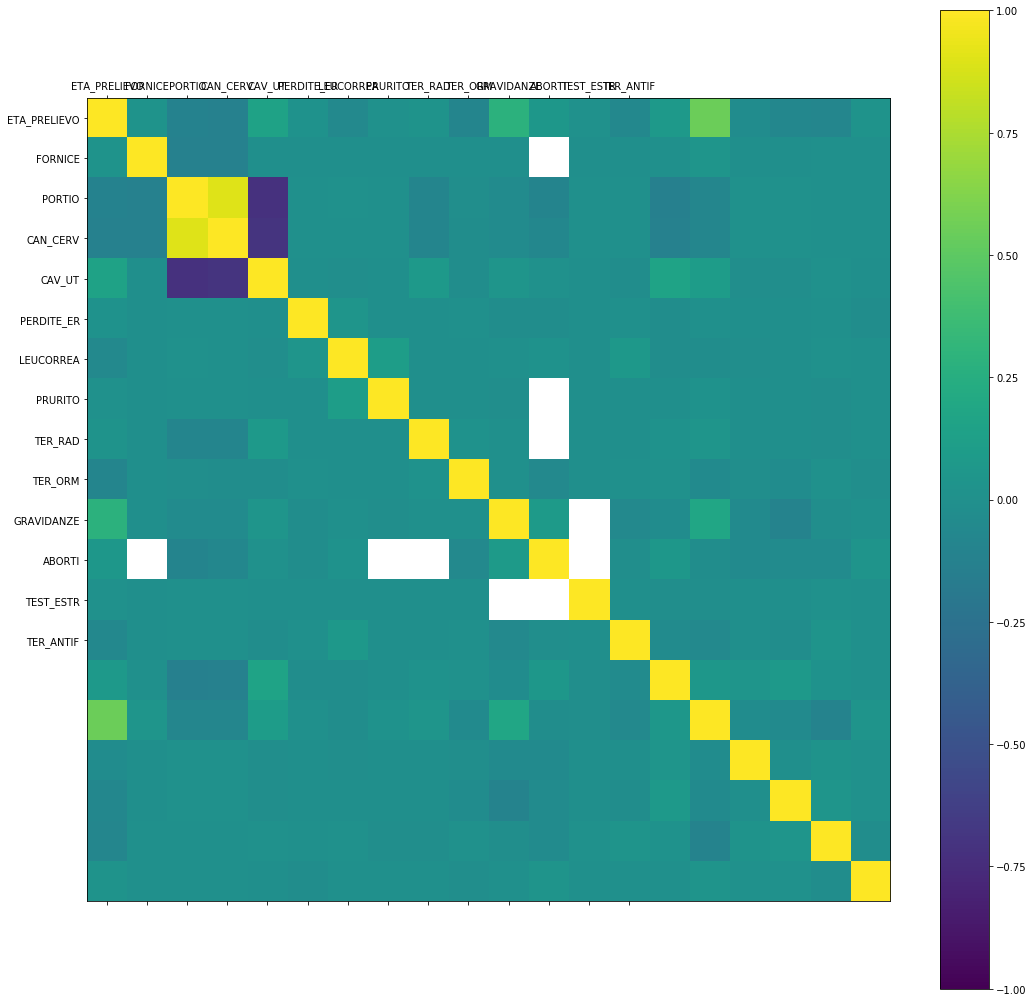

In [53]:
names = list(correlation_matrix.columns)
fig = plt.figure(figsize=[18,18])
ax = fig.add_subplot(111)
cax = ax.matshow(correlation_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [54]:
print(len(df.columns))
print(len(correlation_matrix.columns))
print(set(df.columns) - set(correlation_matrix.columns))

32
20
{'VIRALE', 'DATA_ULTIMA_MESTRUAZIONE', 'BATT_PREC', 'VIRALE_PREC', 'VALIDITA_CAMPIONE', 'DATA_PRELIEVO', 'BATT', 'CITO', 'CTRL_ISTOLOGICO', 'CAUSA_CAMPIONE_NON_VALIDO', 'DATA_PAP_PRECEDENTE', 'CITO_PREC'}


## Cramer's V
https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

In [55]:
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = st.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)

    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [56]:
cols = ['DATA_PRELIEVO', 'DATA_ULTIMA_MESTRUAZIONE',
       'DATA_PAP_PRECEDENTE', 'FORNICE', 'PORTIO', 'CAN_CERV', 'CAV_UT',
       'PERDITE_ER', 'LEUCORREA', 'PRURITO', 'TER_RAD', 'TER_ORM',
       'TEST_ESTR', 'TER_ANTIF', 'OP_GIN', 'MENOPAUSA',
       'AMENORREA', 'POST_PARTUM', 'PRIMO_PAP', 'CITO_PREC', 'VIRALE_PREC',
       'BATT_PREC', 'CTRL_ISTOLOGICO', 'VALIDITA_CAMPIONE',
       'CAUSA_CAMPIONE_NON_VALIDO', 'BATT', 'CITO', 'VIRALE']

for i in cols:
    for j in cols:
        print('----------------------')
        print(i, j)
        if i == j or len(df[i].dropna()) == 0 or len(df[i].dropna()) == 0:
            continue
        confusion_matrix = pd.crosstab(index=df[i].dropna(), columns=df[j].dropna())
        if confusion_matrix.sum().sum() == 0:
            continue
        v = cramers_v(confusion_matrix)
        
        print(v)
        
        

----------------------
DATA_PRELIEVO DATA_PRELIEVO
----------------------
DATA_PRELIEVO DATA_ULTIMA_MESTRUAZIONE
0.6656827074987467
----------------------
DATA_PRELIEVO DATA_PAP_PRECEDENTE
0.144631625435956
----------------------
DATA_PRELIEVO FORNICE
0.0
----------------------
DATA_PRELIEVO PORTIO
0.01963151437184377
----------------------
DATA_PRELIEVO CAN_CERV
0.0
----------------------
DATA_PRELIEVO CAV_UT
0.0
----------------------
DATA_PRELIEVO PERDITE_ER
0.0
----------------------
DATA_PRELIEVO LEUCORREA
0.06861091423391652
----------------------
DATA_PRELIEVO PRURITO
0.0
----------------------
DATA_PRELIEVO TER_RAD
0.022751070560397883
----------------------
DATA_PRELIEVO TER_ORM
0.06425559940936541
----------------------
DATA_PRELIEVO TEST_ESTR
0.0
----------------------
DATA_PRELIEVO TER_ANTIF
0.11000323946946657
----------------------
DATA_PRELIEVO OP_GIN
0.2100258484693812
----------------------
DATA_PRELIEVO MENOPAUSA
0.19102553609902292
----------------------
DATA_PRELIEV

/home/valent0ne/.conda/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/home/valent0ne/.conda/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in long_scalars
  # Remove the CWD from sys.path while we load stuff.
/home/valent0ne/.conda/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/valent0ne/.conda/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/home/valent0ne/.conda/envs/data-analytics/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


nan
----------------------
DATA_ULTIMA_MESTRUAZIONE POST_PARTUM
nan
----------------------
DATA_ULTIMA_MESTRUAZIONE PRIMO_PAP
0.13246804743838278
----------------------
DATA_ULTIMA_MESTRUAZIONE CITO_PREC
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE VIRALE_PREC
0.7897862851668317
----------------------
DATA_ULTIMA_MESTRUAZIONE BATT_PREC
nan
----------------------
DATA_ULTIMA_MESTRUAZIONE CTRL_ISTOLOGICO
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE VALIDITA_CAMPIONE
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE CAUSA_CAMPIONE_NON_VALIDO
0.09805806756909184
----------------------
DATA_ULTIMA_MESTRUAZIONE BATT
0.1885664264473363
----------------------
DATA_ULTIMA_MESTRUAZIONE CITO
0.0
----------------------
DATA_ULTIMA_MESTRUAZIONE VIRALE
nan
----------------------
DATA_PAP_PRECEDENTE DATA_PRELIEVO
0.14463162543595603
----------------------
DATA_PAP_PRECEDENTE DATA_ULTIMA_MESTRUAZIONE
0.09198936487933625
----------------------
DATA_PAP_PRECEDENTE DATA_PAP_PRECEDENTE
---

0.057656674633598894
----------------------
CAV_UT CAUSA_CAMPIONE_NON_VALIDO
0.046513025470953165
----------------------
CAV_UT BATT
0.0
----------------------
CAV_UT CITO
0.057211239172327996
----------------------
CAV_UT VIRALE
nan
----------------------
PERDITE_ER DATA_PRELIEVO
0.0
----------------------
PERDITE_ER DATA_ULTIMA_MESTRUAZIONE
0.20169940367116276
----------------------
PERDITE_ER DATA_PAP_PRECEDENTE
0.0
----------------------
PERDITE_ER FORNICE
0.07065133443524851
----------------------
PERDITE_ER PORTIO
0.0
----------------------
PERDITE_ER CAN_CERV
0.0
----------------------
PERDITE_ER CAV_UT
0.0
----------------------
PERDITE_ER PERDITE_ER
----------------------
PERDITE_ER LEUCORREA
0.0293530680238412
----------------------
PERDITE_ER PRURITO
0.10103148355922978
----------------------
PERDITE_ER TER_RAD
0.07065133443524851
----------------------
PERDITE_ER TER_ORM
0.0
----------------------
PERDITE_ER TEST_ESTR
0.07065133443524851
----------------------
PERDITE_ER TE

0.07065133443524851
----------------------
TEST_ESTR LEUCORREA
0.014531516999158344
----------------------
TEST_ESTR PRURITO
0.17620351539016377
----------------------
TEST_ESTR TER_RAD
0.12415264681813028
----------------------
TEST_ESTR TER_ORM
0.0
----------------------
TEST_ESTR TEST_ESTR
----------------------
TEST_ESTR TER_ANTIF
0.0
----------------------
TEST_ESTR OP_GIN
0.0
----------------------
TEST_ESTR MENOPAUSA
0.0
----------------------
TEST_ESTR AMENORREA
0.03721379599170986
----------------------
TEST_ESTR POST_PARTUM
0.017735093350910953
----------------------
TEST_ESTR PRIMO_PAP
0.0
----------------------
TEST_ESTR CITO_PREC
nan
----------------------
TEST_ESTR VIRALE_PREC
nan
----------------------
TEST_ESTR BATT_PREC
nan
----------------------
TEST_ESTR CTRL_ISTOLOGICO
nan
----------------------
TEST_ESTR VALIDITA_CAMPIONE
0.0
----------------------
TEST_ESTR CAUSA_CAMPIONE_NON_VALIDO
nan
----------------------
TEST_ESTR BATT
0.0
----------------------
TEST_ESTR CIT

0.0
----------------------
POST_PARTUM POST_PARTUM
----------------------
POST_PARTUM PRIMO_PAP
0.042778678441850786
----------------------
POST_PARTUM CITO_PREC
0.0
----------------------
POST_PARTUM VIRALE_PREC
nan
----------------------
POST_PARTUM BATT_PREC
nan
----------------------
POST_PARTUM CTRL_ISTOLOGICO
nan
----------------------
POST_PARTUM VALIDITA_CAMPIONE
0.0
----------------------
POST_PARTUM CAUSA_CAMPIONE_NON_VALIDO
nan
----------------------
POST_PARTUM BATT
0.0
----------------------
POST_PARTUM CITO
0.0
----------------------
POST_PARTUM VIRALE
nan
----------------------
PRIMO_PAP DATA_PRELIEVO
0.26859424663580334
----------------------
PRIMO_PAP DATA_ULTIMA_MESTRUAZIONE
0.1324680474383828
----------------------
PRIMO_PAP DATA_PAP_PRECEDENTE
nan
----------------------
PRIMO_PAP FORNICE
0.0
----------------------
PRIMO_PAP PORTIO
0.0
----------------------
PRIMO_PAP CAN_CERV
0.0
----------------------
PRIMO_PAP CAV_UT
0.008769991927219417
----------------------
PRI

0.028978659422728703
----------------------
VALIDITA_CAMPIONE TEST_ESTR
0.0
----------------------
VALIDITA_CAMPIONE TER_ANTIF
0.0
----------------------
VALIDITA_CAMPIONE OP_GIN
0.0
----------------------
VALIDITA_CAMPIONE MENOPAUSA
0.01595416162858474
----------------------
VALIDITA_CAMPIONE AMENORREA
0.0
----------------------
VALIDITA_CAMPIONE POST_PARTUM
0.0
----------------------
VALIDITA_CAMPIONE PRIMO_PAP
0.0076772744526584745
----------------------
VALIDITA_CAMPIONE CITO_PREC
0.060953680440072704
----------------------
VALIDITA_CAMPIONE VIRALE_PREC
nan
----------------------
VALIDITA_CAMPIONE BATT_PREC
nan
----------------------
VALIDITA_CAMPIONE CTRL_ISTOLOGICO
nan
----------------------
VALIDITA_CAMPIONE VALIDITA_CAMPIONE
----------------------
VALIDITA_CAMPIONE CAUSA_CAMPIONE_NON_VALIDO
nan
----------------------
VALIDITA_CAMPIONE BATT
nan
----------------------
VALIDITA_CAMPIONE CITO
0.0
----------------------
VALIDITA_CAMPIONE VIRALE
nan
----------------------
CAUSA_CAMPI

## ANOVA 
https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

In [57]:
model = ols('ETA_PRELIEVO ~ DATA_PRELIEVO', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('Eta squared:  ',esq_sm)
print()


                     sum_sq      df         F    PR(>F)
DATA_PRELIEVO  1.932065e+04    69.0  1.802471  0.000055
Residual       1.356805e+06  8734.0       NaN       NaN
Eta squared:   0.014039887210603902



In [58]:
model = ols('DATA_PAP_PRECEDENTE ~ CITO', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

esq_sm = aov_table['sum_sq'][0]/(aov_table['sum_sq'][0]+aov_table['sum_sq'][1])
print('Eta squared:  ',esq_sm)
print()


ValueError: shapes (8711,82) and (8711,82) not aligned: 82 (dim 1) != 8711 (dim 0)